#Setup Environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from itertools import combinations
from collections import Counter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Dataset

In [ ]:
januari = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_january_2019.csv'
februari = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_february_2019.csv'
maret = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_march_2019.csv'
april = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_april_2019.csv'
mei = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_may_2019.csv'
juni = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_june_2019.csv'
juli = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_july_2019.csv'
agustus = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_august_2019.csv'
september = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_september_2019.csv'
oktober = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_october_2019.csv'
november = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_november_2019.csv'
desember = '/content/drive/My Drive/Colab Notebooks/Day 7 Extra Class Time Series Forecasting/Assignment/Dataset/sales_data_december_2019.csv'
df_1 = pd.read_csv(januari)
df_2 = pd.read_csv(februari)
df_3 = pd.read_csv(maret)
df_4 = pd.read_csv(april)
df_5 = pd.read_csv(mei)
df_6 = pd.read_csv(juni)
df_7 = pd.read_csv(juli)
df_8 = pd.read_csv(agustus)
df_9 = pd.read_csv(september)
df_10 = pd.read_csv(oktober)
df_11 = pd.read_csv(november)
df_12 = pd.read_csv(desember)
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12], ignore_index=True)
df.shape

(186850, 6)

In [ ]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17397,157814,AA Batteries (4-pack),2,3.84,02/07/19 15:55,"417 Main St, Los Angeles, CA 90001"
24920,165012,iPhone,1,700,03/25/19 13:22,"375 Willow St, New York City, NY 10001"
3888,144919,Bose SoundSport Headphones,1,99.99,01/12/19 21:02,"128 Hickory St, Atlanta, GA 30301"
47576,186669,Google Phone,1,600,04/09/19 23:09,"651 Meadow St, Portland, OR 97035"
182495,315498,27in 4K Gaming Monitor,1,389.99,12/21/19 01:55,"106 Madison St, San Francisco, CA 94016"


#Types data, Checking Missing Value, Duplicates, and Handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
#Check Missing Value
print(df.isnull().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [ ]:
#check Duplicate
print(df.duplicated().sum())

1162


In [ ]:
#drop duplicates
df_clean = df.drop_duplicates()
df_clean.shape

(185688, 6)

In [ ]:
#drop Missing Values
df_clean = df_clean.dropna()
df_clean.shape

(185687, 6)

In [ ]:
#cek anomali data
df_clean = df_clean.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_clean.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [ ]:
#ubah data type dari kolom Quantity Ordered dan Price Each dari object menjadi numeric
df_clean['Quantity Ordered'] = pd.to_numeric(df_clean['Quantity Ordered'], errors='coerce')
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'], errors='coerce')

In [ ]:
#di handling drop missing valuesnya just make sure
df_clean.dropna(subset=['Quantity Ordered', 'Price Each'])
df_clean.shape

(185687, 6)

In [ ]:
#ubah data type kolom order date dari object menjadi datetime
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')
df_clean.info()

/tmp/ipython-input-14-3826749257.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185687 non-null  object        
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [ ]:
#Drop missing value, just make sure
df_clean = df_clean.dropna(subset=['Order Date'])
df_clean.shape

(185686, 6)

#EDA

In [ ]:
#Membentuk kolom baru berdasarkan kolom order date di pecah, per tanggal, per bulan, per hari, per jam
df_clean['Month'] = df_clean['Order Date'].dt.month
df_clean['Day_Full'] = df_clean['Order Date'].dt.date
df_clean['Weekday'] = df_clean['Order Date'].dt.day_name()
df_clean['Day_Num'] = df_clean['Order Date'].dt.day
df_clean['Hour'] = df_clean['Order Date'].dt.hour
df_clean.sample(1)

/tmp/ipython-input-16-191086920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Order Date'].dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day_Full,Weekday,Day_Num,Hour
75816,213541,Bose SoundSport Headphones,1.0,99.99,2019-06-11 18:41:00,"523 Park St, Seattle, WA 98101",6,2019-06-11,Tuesday,11,18


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int32         
 7   Day_Full          185686 non-null  object        
 8   Weekday           185686 non-null  object        
 9   Day_Num           185686 non-null  int32         
 10  Hour              185686 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(5)
memory usage: 14.9+ MB


##Daily, Weekly, Monthly by Quantity Ordered

In [ ]:
#mengelompokkan penjualan per  harian, dan bulanan
daily_sales = df_clean.groupby('Day_Num').agg({'Quantity Ordered': 'sum'}).reset_index()
monthly_sales = df_clean.groupby('Month').agg({'Quantity Ordered': 'sum'}).reset_index()


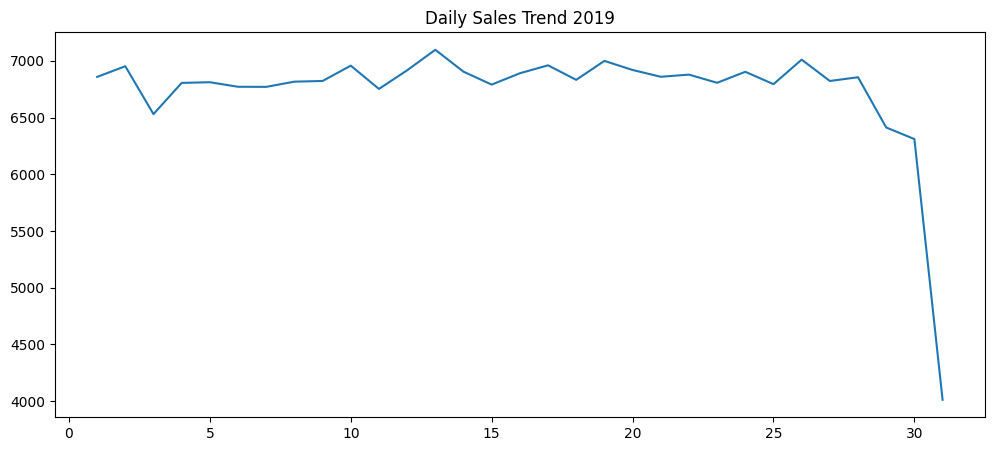

In [ ]:
#Visualisasi
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Day_Num'], daily_sales['Quantity Ordered'])
plt.title('Daily Sales Trend 2019')
plt.show()

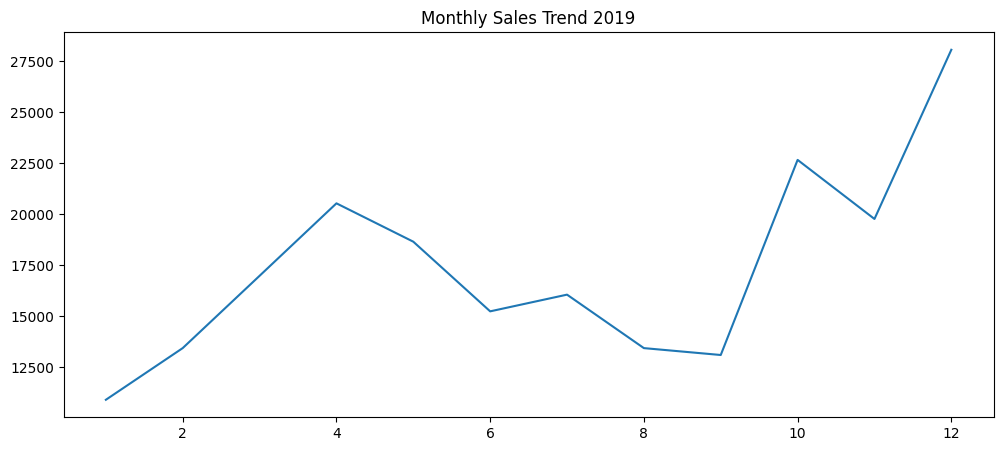

In [ ]:
#Visualisasi
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month'], monthly_sales['Quantity Ordered'])
plt.title('Monthly Sales Trend 2019')
plt.show()

In [ ]:
weekday_sales = df_clean.groupby('Weekday').agg({'Quantity Ordered': 'sum'}).sort_values(by='Quantity Ordered')
print(weekday_sales)

           Quantity Ordered
Weekday                    
Friday              29415.0
Thursday            29618.0
Saturday            29729.0
Sunday              29745.0
Wednesday           29759.0
Monday              29860.0
Tuesday             30686.0


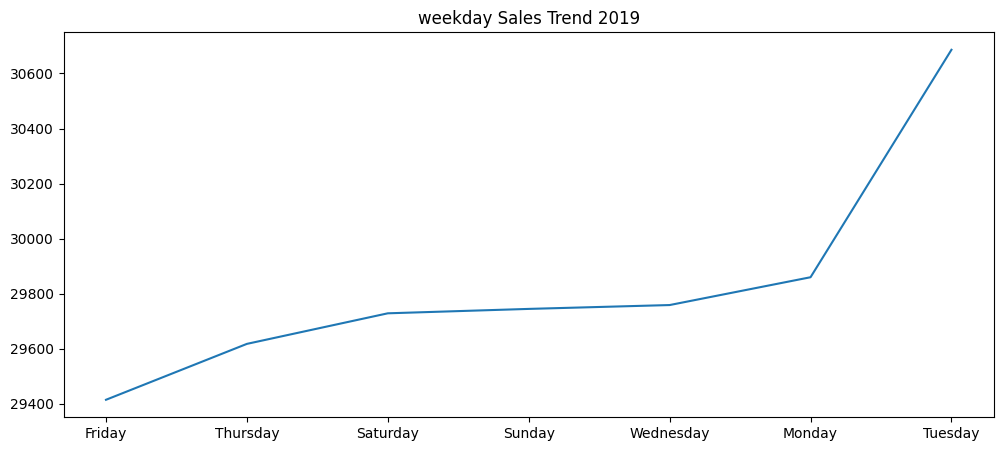

In [ ]:
#Visualisasi
plt.figure(figsize=(12,5))
plt.plot(weekday_sales.index, weekday_sales['Quantity Ordered'])
plt.title('weekday Sales Trend 2019')
plt.show()

##Daily, Weekly, Monthly, Hourly by Revenue

In [ ]:
#Menambahkan kolom Revenue, mau tau pendapatan penjualan.
df_clean['Revenue'] = df_clean['Quantity Ordered'] * df_clean['Price Each']
total_revenue = df_clean['Revenue'].sum()

In [ ]:
total_orders = df_clean['Order ID'].nunique()

In [ ]:
total_items = df_clean['Quantity Ordered'].sum()

##Hasil dari total pendapatan, Total Order, Rata-rata Penjualan, dan Rata-rata pendapatan

In [ ]:
avg_items_per_order = total_items / total_orders
avg_spending_per_order = total_revenue / total_orders
print("*** Metrik Dasar 2019 ***")
print(f"Total Revenue (GMV): ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Items Sold: {total_items:,}")
print(f"Avg Items per Order: {avg_items_per_order:.2f}")
print(f"Avg Spending per Order: ${avg_spending_per_order:.2f}")

*** Metrik Dasar 2019 ***
Total Revenue (GMV): $34,465,537.94
Total Orders: 178,437
Total Items Sold: 208,812.0
Avg Items per Order: 1.17
Avg Spending per Order: $193.15


##Penjualan harian, mingguan, dan bulanan

In [ ]:
df_clean['Week'] = df_clean['Order Date'].dt.isocalendar().week

daily_summary = df_clean.groupby('Day_Full').agg({'Order ID':'nunique', 'Revenue':'sum'}).reset_index()
weekly_summary = df_clean.groupby('Week').agg({'Order ID':'nunique', 'Revenue':'sum'}).reset_index()
monthly_summary = df_clean.groupby('Month').agg({'Order ID':'nunique', 'Revenue':'sum'}).reset_index()

In [ ]:
print("\n*** Daily Summary 2019 ***")
print(daily_summary.head())

print("\n*** Weekly Summary 2019 ***")
print(weekly_summary.head())

print("\n*** Monthly Summary 2019 ***")
print(monthly_summary.head())


*** Daily Summary 2019 ***
     Day_Full  Order ID   Revenue
0  2019-01-01       287  65681.94
1  2019-01-02       308  70663.20
2  2019-01-03       286  47046.20
3  2019-01-04       282  62000.22
4  2019-01-05       301  46524.63

*** Weekly Summary 2019 ***
   Week  Order ID    Revenue
0     1      3290  636646.16
1     2      2104  409389.43
2     3      2104  394921.11
3     4      2134  426020.17
4     5      2381  459570.62

*** Monthly Summary 2019 ***
   Month  Order ID     Revenue
0      1      9293  1821413.16
1      2     11496  2200078.08
2      3     14549  2804973.35
3      4     17528  3389217.98
4      5     15836  3150616.23


##Top 10 Produk 3 bulan terakhir (0kt-Des 2019)

In [ ]:
last_3_months = df_clean[df_clean['Month'].isin([10,11,12])].copy()

last_3_months['Revenue'] = last_3_months['Quantity Ordered'] * last_3_months['Price Each']

top_products = (last_3_months.groupby('Product')['Revenue']
                .sum()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())

print("\n*** TOP 10 Produk (Okt–Des 2019) ***")
print(top_products)


*** TOP 10 Produk (Okt–Des 2019) ***
                      Product     Revenue
0          Macbook Pro Laptop  2733600.00
1                      iPhone  1600900.00
2             ThinkPad Laptop  1371986.28
3                Google Phone  1082400.00
4      27in 4K Gaming Monitor   841988.41
5    Apple Airpods Headphones   787800.00
6      34in Ultrawide Monitor   786579.30
7               Flatscreen TV   493800.00
8  Bose SoundSport Headphones   453054.69
9            27in FHD Monitor   370325.31


##Top 10 Bundling produk dalam 3 bulan terakhir

In [ ]:
df_top = last_3_months[last_3_months['Product'].isin(top_products['Product'])]

order_products = df_top.groupby('Order ID')['Product'].apply(list)

pair_counter = Counter()
for products in order_products:
    if len(products) > 1:  # hanya hitung order dengan >1 produk
        for combo in combinations(sorted(products), 2):
            pair_counter[combo] += 1

top_pairs = pair_counter.most_common(10)
print("\n*** TOP 10 PASANGAN PRODUK (Bundling Potensial) ***")
for pair, count in top_pairs:
    print(f"{pair}: {count} kali dibeli bersama")


*** TOP 10 PASANGAN PRODUK (Bundling Potensial) ***
('Apple Airpods Headphones', 'iPhone'): 132 kali dibeli bersama
('Bose SoundSport Headphones', 'Google Phone'): 81 kali dibeli bersama
('Apple Airpods Headphones', 'Bose SoundSport Headphones'): 16 kali dibeli bersama
('27in FHD Monitor', 'Apple Airpods Headphones'): 10 kali dibeli bersama
('34in Ultrawide Monitor', 'Bose SoundSport Headphones'): 8 kali dibeli bersama
('27in FHD Monitor', 'Bose SoundSport Headphones'): 8 kali dibeli bersama
('27in 4K Gaming Monitor', 'Bose SoundSport Headphones'): 7 kali dibeli bersama
('Apple Airpods Headphones', 'Google Phone'): 7 kali dibeli bersama
('Apple Airpods Headphones', 'Macbook Pro Laptop'): 7 kali dibeli bersama
('27in 4K Gaming Monitor', 'Apple Airpods Headphones'): 6 kali dibeli bersama


##Top 5 Kota based on penjualan dan transaction order

In [ ]:
# Ekstrak kota dari Purchase Address
df_clean['City'] = df_clean['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if pd.notnull(x) else np.nan)

city_summary = df_clean.groupby('City').agg({
    'Order ID':'nunique',
    'Revenue':'sum'
}).reset_index()

city_summary['Avg_Spending'] = city_summary['Revenue'] / city_summary['Order ID']

top5_order_city = city_summary.sort_values(by='Order ID', ascending=False).head(5)
top5_revenue_city = city_summary.sort_values(by='Revenue', ascending=False).head(5)
top5_avg_spending_city = city_summary.sort_values(by='Avg_Spending', ascending=False).head(5)

print("\n=== TOP 5 Kota Berdasarkan Order ===")
print(top5_order_city)

print("\n=== TOP 5 Kota Berdasarkan Total Revenue ===")
print(top5_revenue_city)

print("\n=== TOP 5 Kota Berdasarkan Rata-rata Spending ===")
print(top5_avg_spending_city)


=== TOP 5 Kota Berdasarkan Order ===
            City  Order ID     Revenue  Avg_Spending
7  San Francisco     42898  8254743.55    192.427236
4    Los Angeles     28498  5448304.28    191.181988
5  New York City     23848  4661867.14    195.482520
2         Boston     19092  3658627.65    191.631450
0        Atlanta     14253  2794199.07    196.042873

=== TOP 5 Kota Berdasarkan Total Revenue ===
            City  Order ID     Revenue  Avg_Spending
7  San Francisco     42898  8254743.55    192.427236
4    Los Angeles     28498  5448304.28    191.181988
5  New York City     23848  4661867.14    195.482520
2         Boston     19092  3658627.65    191.631450
0        Atlanta     14253  2794199.07    196.042873

=== TOP 5 Kota Berdasarkan Rata-rata Spending ===
            City  Order ID     Revenue  Avg_Spending
0        Atlanta     14253  2794199.07    196.042873
5  New York City     23848  4661867.14    195.482520
8        Seattle     14119  2745046.02    194.422128
3         Dallas 

##Jam Penjualan jam tertinggi (Rush Hour)

In [ ]:
hourly_summary = df_clean.groupby('Hour').agg(
    Orders = ('Order ID','nunique'),
    GMV= ('Revenue','sum')
    ).reset_index()

peak_hour_orders = hourly_summary.loc[hourly_summary['Orders'].idxmax()]
peak_hour_gmv = hourly_summary.loc[hourly_summary['GMV'].idxmax()]

print("\nJAM PENJUALAN TERTINGGI (Rush Hour)")
print(f"Jam dengan jumlah order tertinggi  : {peak_hour_orders['Hour']} (Total Order: {peak_hour_orders['Orders']})")
print(f"Jam dengan GMV (Revenue) tertinggi : {peak_hour_gmv['Hour']} (GMV: ${peak_hour_gmv['GMV']:,.2f})")



JAM PENJUALAN TERTINGGI (Rush Hour)
Jam dengan jumlah order tertinggi  : 19.0 (Total Order: 12377.0)
Jam dengan GMV (Revenue) tertinggi : 19.0 (GMV: $2,411,971.14)


##Visualisasi

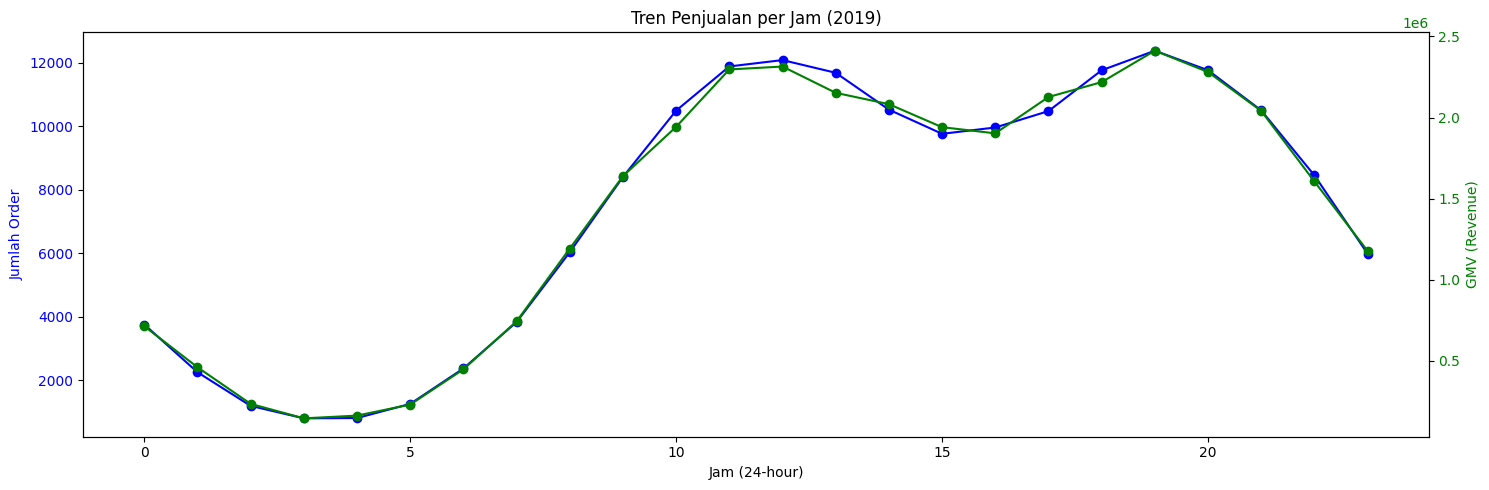

In [ ]:
# Grafik Rush Hour (Revenue)
fig, ax1 = plt.subplots(figsize=(15,5))

# Sumbu pertama (kiri) untuk Orders
color = 'blue'
ax1.set_xlabel('Jam (24-hour)')
ax1.set_ylabel('Jumlah Order', color=color)
ax1.plot(hourly_summary['Hour'], hourly_summary['Orders'], marker='o', color=color, label='Jumlah Order')
ax1.tick_params(axis='y', labelcolor=color)

# Sumbu kedua (kanan) untuk GMV
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('GMV (Revenue)', color=color)
ax2.plot(hourly_summary['Hour'], hourly_summary['GMV'], marker='o', color=color, label='GMV (Revenue)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tren Penjualan per Jam (2019)')
fig.tight_layout()
plt.show()

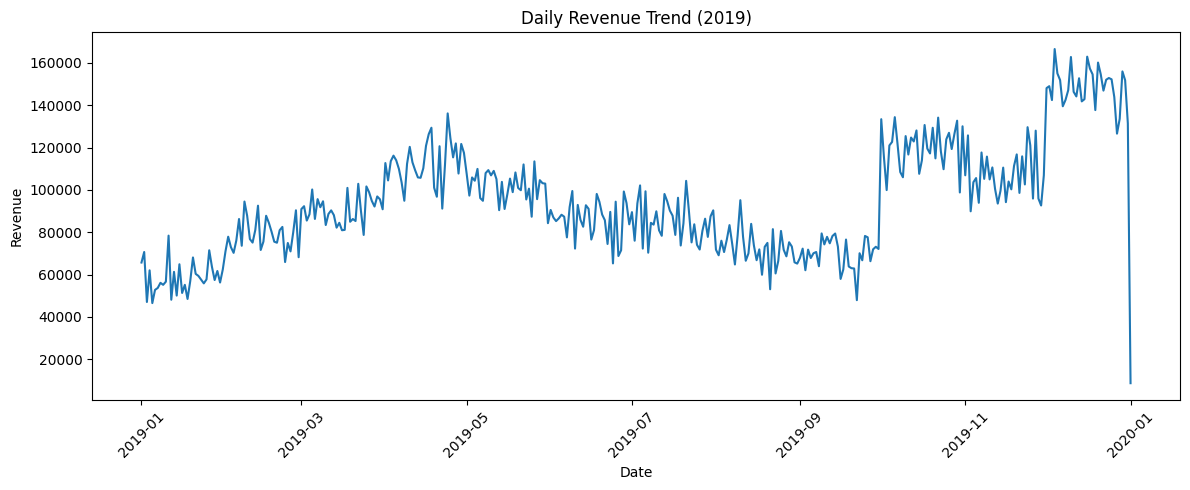

In [ ]:
# Grafik Tren Harian Revenue
plt.figure(figsize=(12,5))
plt.plot(daily_summary['Day_Full'], daily_summary['Revenue'])
plt.title('Daily Revenue Trend (2019)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-35-1410225605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_summary, x='Week', y='Revenue', palette='viridis')


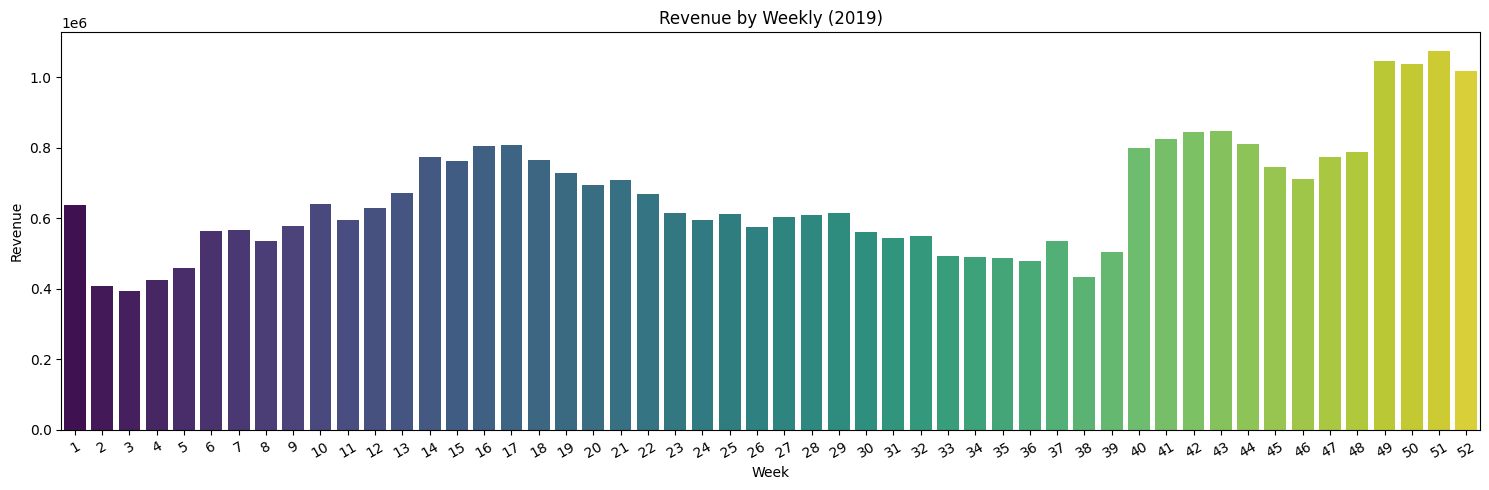

In [ ]:
# Weekly
plt.figure(figsize=(15,5))
sns.barplot(data=weekly_summary, x='Week', y='Revenue', palette='viridis')
plt.title('Revenue by Weekly (2019)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

/tmp/ipython-input-36-2511812483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Revenue', y='Product', palette='viridis')


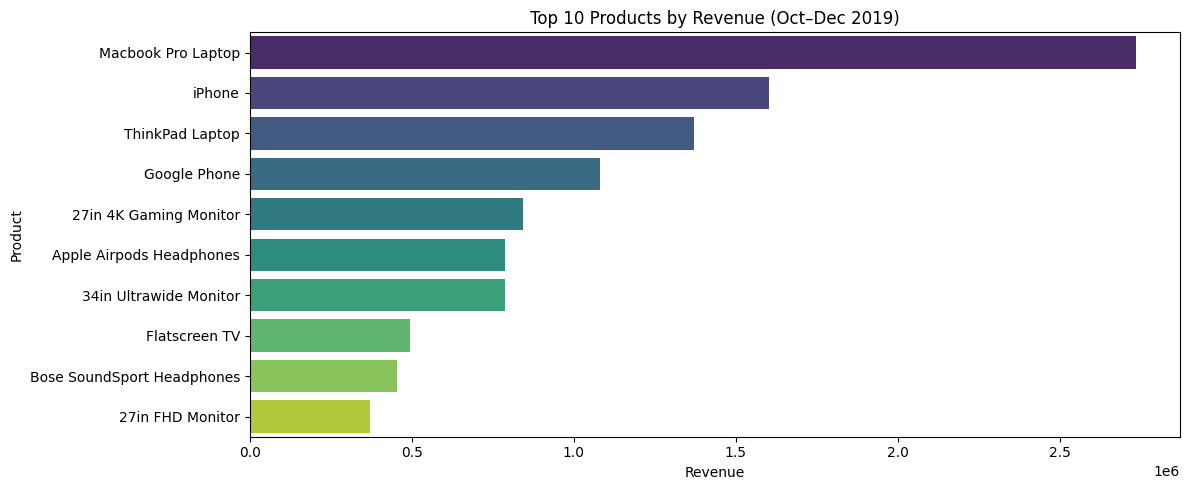

In [ ]:
# Grafik Top Produk (Revenue)
plt.figure(figsize=(12,5))
sns.barplot(data=top_products, x='Revenue', y='Product', palette='viridis')
plt.title('Top 10 Products by Revenue (Oct–Dec 2019)')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

#Forecast

##Pilih feature yang akan dilakukan forecast Date dan Order ID

In [ ]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'],errors='coerce')

daily_transaction = df_clean.groupby(df_clean['Order Date'].dt.date)['Order ID'].nunique().reset_index()

daily_transaction.columns = ['Date','Transaction_count']

daily_transaction['Date']= pd.to_datetime(daily_transaction['Date'])



In [ ]:
ts_transaction = daily_transaction.set_index('Date')['Transaction_count']
ts_transaction.head()

,Transaction_count
Date,
2019-01-01,287
2019-01-02,308
2019-01-03,286
2019-01-04,282
2019-01-05,301


##Check Data Stationer dengan Uji ADF dan P-Value

In [ ]:
adf_result = adfuller(ts_transaction)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -2.5693373565434507
p-value: 0.099501644735832


Di sini terlihat P-Valuenya > 0.05 sehingga data tidak stationer, harus dilakukan transform

##Log Transform data

In [ ]:
ts_transaction_log = np.log(ts_transaction)
ts_transaction_log_diff = ts_transaction_log.diff().dropna()

##Recheck data stationer data yang sudah ditransform Log

In [ ]:
adf_result = adfuller(ts_transaction_log_diff)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -11.855563596476848
p-value: 7.041610099983097e-22


setelah ditransform terlihat P-Valuenya sudah lebih kecil dari 0.05 sehingga data sudah siap untuk dilakukan pemodelan.

##Split data Train dan Test

In [ ]:
train = ts_transaction_log[:'2019-06-30']
test = ts_transaction_log['2019-07-01':]

Train di split data dari 01 Januari 2019 - 30 Juni 2019

Test di split data dari 01 Juli 2019 - 31 Desember 2019

dengan porsi data train dan test 50:50

#Model Sarimax vs ETS

In [ ]:
sarima_model = SARIMAX(train,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Forecast sepanjang periode test
sarima_forecast = sarima_result.get_forecast(steps=len(test))
sarima_pred = sarima_forecast.predicted_mean

# Model ETS (Holt-Winters)
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
ets_result = ets_model.fit()
ets_pred = ets_result.forecast(steps=len(test))

# Evaluasi Kedua Model
def evaluate_model(y_true, y_pred, model_name):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"=== {model_name} ===")
    print(f"MAPE : {mape:.2%}")
    print(f"MAE  : {mae:,.2f}")
    print(f"RMSE : {rmse:,.2f}\n")
    return mape, mae, rmse

mape_sarima, mae_sarima, rmse_sarima = evaluate_model(test, sarima_pred, "SARIMA")
mape_ets, mae_ets, rmse_ets = evaluate_model(test, ets_pred, "ETS")

# Tentukan model terbaik
best_model = "SARIMA" if mape_sarima < mape_ets else "ETS"
print(f"Model terbaik untuk forecasting Januari 2020: {best_model}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


=== SARIMA ===
MAPE : 5.25%
MAE  : 0.33
RMSE : 0.45

=== ETS ===
MAPE : 5.04%
MAE  : 0.31
RMSE : 0.43

Model terbaik untuk forecasting Januari 2020: ETS


##Perbandingan 2 Model Sarimax vs ETS

In [ ]:
sarima_model = SARIMAX(ts_transaction,
                       order=(1,1,1),
                       seasonal_order=(1,0,1,7),  # D=0 biar level tidak anjlok
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

sarima_forecast = sarima_result.get_forecast(steps=31)
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()

#ETS (Holt-Winters)
ets_model = ExponentialSmoothing(ts_transaction, trend='add', seasonal='add', seasonal_periods=7)
ets_result = ets_model.fit()
ets_forecast = ets_result.forecast(31)

#Buat tanggal untuk forecast
future_dates = pd.date_range(start='2020-01-01', periods=31, freq='D')

#Gabungkan ke DataFrame untuk perbandingan
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'SARIMA_Forecast': sarima_mean.values,
    'ETS_Forecast': ets_forecast.values
})
forecast_df.set_index('Date', inplace=True)
forecast_df.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,SARIMA_Forecast,ETS_Forecast
Date,,
2020-01-01,321.961035,329.459575
2020-01-02,336.749392,326.572321
2020-01-03,334.378088,330.374425
2020-01-04,333.906663,331.509607
2020-01-05,335.857480,331.827510


##Visualisasi Sarimax vs ETS

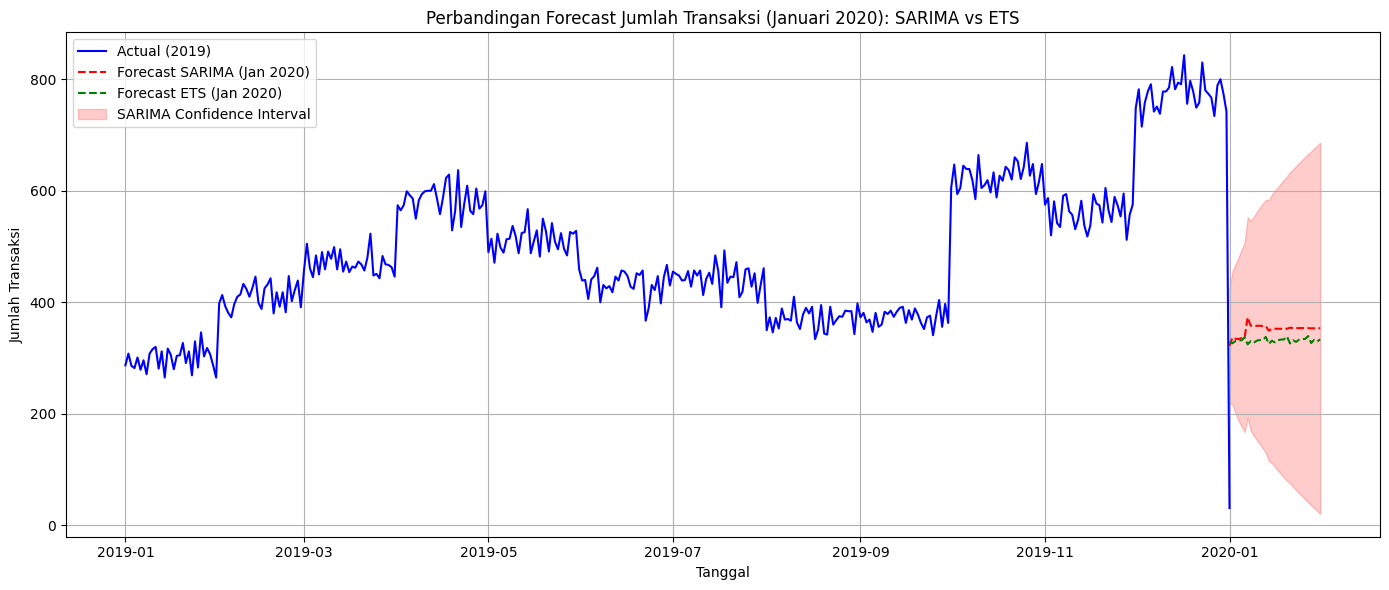

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(ts_transaction.index, ts_transaction, label='Actual (2019)', color='blue')
plt.plot(forecast_df.index, forecast_df['SARIMA_Forecast'],
         label='Forecast SARIMA (Jan 2020)', color='red', linestyle='--')
plt.plot(forecast_df.index, forecast_df['ETS_Forecast'],
         label='Forecast ETS (Jan 2020)', color='green', linestyle='--')

# Tambah Confidence Interval untuk SARIMA
plt.fill_between(forecast_df.index,
                 sarima_ci.iloc[:,0], sarima_ci.iloc[:,1],
                 color='red', alpha=0.2, label='SARIMA Confidence Interval')

plt.title('Perbandingan Forecast Jumlah Transaksi (Januari 2020): SARIMA vs ETS')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dari sini bisa terlihat untuk data Sarimax lebih fluktuasi, naik-turun dengan musiman yang lebih jelas

Model ETS aman untuk baseline (lebih konservatif)

ETS (dengan trend dan seasonal) cenderung menghaluskan data sehingga prediksi untuk masa depan jadi rata-rata dari pola musiman sebelumnya

#Final Model

In [ ]:
# Fit ulang ETS ke seluruh data 2019 (supaya model belajar semua pola)
final_ets_model = ExponentialSmoothing(ts_transaction, trend='add', seasonal='add', seasonal_periods=7).fit()

# Forecast 31 hari (Januari 2020)
forecast_ets = final_ets_model.forecast(steps=31)

# Siapkan tanggal untuk hasil forecast
forecast_dates = pd.date_range(start='2020-01-01', periods=31, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Transaction': forecast_ets.values})
forecast_df.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Date,Forecasted_Transaction
0,2020-01-01,329.459575
1,2020-01-02,326.572321
2,2020-01-03,330.374425
3,2020-01-04,331.509607
4,2020-01-05,331.827510


Dikarenakan MAPEnya paling baik adalah ETS, maka untuk forecast Januari 2020 menggunakan ETS.

##Visualisasi Final Model

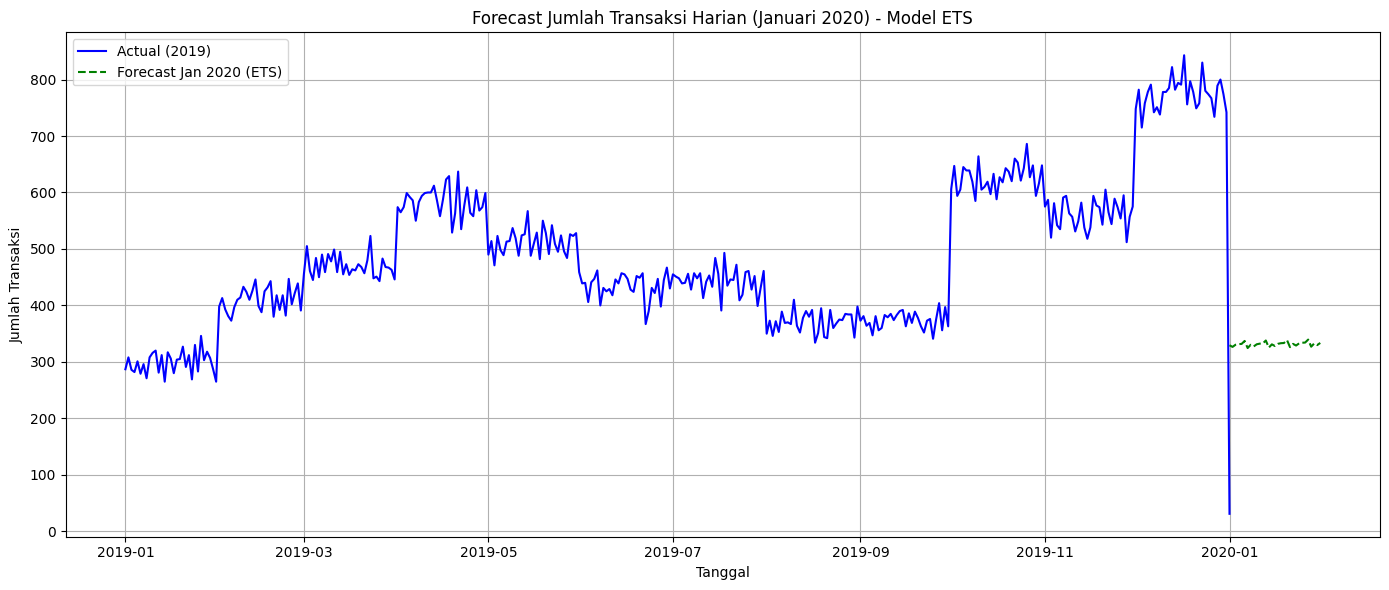

In [ ]:
# Plot hasilnya
plt.figure(figsize=(14,6))
plt.plot(ts_transaction.index, ts_transaction.values, label='Actual (2019)', color='blue')
plt.plot(forecast_dates, forecast_ets.values, label='Forecast Jan 2020 (ETS)', color='green', linestyle='--')
plt.title('Forecast Jumlah Transaksi Harian (Januari 2020) - Model ETS')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

hasil forecast ETS untuk Januari 2020 kelihatan agak flat (mendatar), hanya sedikit naik-turun.

Itu terjadi karena:

  1. ETS (dengan trend dan seasonal) cenderung menghaluskan data sehingga prediksi untuk masa depan jadi rata-rata dari pola musiman sebelumnya.

  2. Ada kemungkinan data Desember 2019 punya level sangat tinggi (sekitar 700–800 transaksi/hari), sedangkan sebagian besar 2019 jauh lebih rendah. ETS menganggap lonjakan itu mungkin anomali, jadi level prediksinya kembali turun ke sekitar 320–340 transaksi/hari.

  3. Tidak ada komponen shock besar atau event (seperti promo) yang dimasukkan ke model, jadi model tidak bisa memproyeksikan lonjakan.

Artinya:

  - Model ETS aman untuk baseline (lebih konservatif), tapi bisa terlalu pesimis kalau di Januari 2020 ada promo/event yang bikin lonjakan lagi.

  - Kalau mau hasil prediksi lebih “hidup” (naik-turun dengan musiman yang lebih jelas), SARIMA dengan musiman mingguan (7 hari) lebih cocok, meskipun MAPE-nya sedikit lebih tinggi.